# Process Renovar O3 Data according to reference station

## Constants and imports

In [278]:
input_data_directory = 'data/output/'
SENSOR_1_NAME = 'alpha_o3_1_conc'
SENSOR_2_NAME = 'alpha_o3_2_conc'
SENSOR_NAME = 'alpha_o3_conc'
sensor_1_data_path = input_data_directory + SENSOR_1_NAME + '_dataframe.csv'
sensor_2_data_path = input_data_directory + SENSOR_2_NAME + '_dataframe.csv'
temperature_data_path = input_data_directory + 'chamber_tempdataframe.csv'
temperature_data_path_1HR = input_data_directory + 'chamber_tempdataframe_1hr.csv'

## Load Alphasense O3 (1) sensor data

In [279]:
import pandas as pd

sensor_data = pd.read_csv(sensor_1_data_path)
sensor_data['DateTime'] = pd.to_datetime(sensor_data['DateTime'], infer_datetime_format=True)
sensor_data = sensor_data.sort_values(by='DateTime', ascending=True).reset_index().drop(columns='index')
sensor_data.index = sensor_data['DateTime']
sensor_data = sensor_data.drop(columns='DateTime')
sensor_data = sensor_data[['value', 'Tag']].rename(columns={'value': 'measuring 1', 'Tag': 'Tag 1'})
sensor_data.head()

/var/folders/wc/_83zcrx913j1dqwg4g90kbhh0000gp/T/ipykernel_9080/2542705798.py:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  sensor_data['DateTime'] = pd.to_datetime(sensor_data['DateTime'], infer_datetime_format=True)


,measuring 1,Tag 1
DateTime,,
2022-11-20 13:45:00,NaN,REBASE
2022-11-20 14:00:00,NaN,REBASE
2022-11-20 14:15:00,NaN,REBASE
2022-11-20 14:30:00,NaN,REBASE
2022-11-20 14:45:00,NaN,REBASE


## Load Alphasense O3 (2) sensor data

In [280]:
import pandas as pd

sensor_2_data = pd.read_csv(sensor_2_data_path)
sensor_2_data['DateTime'] = pd.to_datetime(sensor_2_data['DateTime'], infer_datetime_format=True)
sensor_2_data = sensor_2_data.sort_values(by='DateTime', ascending=True).reset_index().drop(columns='index')
sensor_2_data.index = sensor_2_data['DateTime']
sensor_2_data = sensor_2_data.drop(columns='DateTime')
sensor_2_data = sensor_2_data[['value', 'Tag']].rename(columns={'value': 'measuring 2', 'Tag': 'Tag 2'})
sensor_2_data.head()

/var/folders/wc/_83zcrx913j1dqwg4g90kbhh0000gp/T/ipykernel_9080/2079243632.py:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  sensor_2_data['DateTime'] = pd.to_datetime(sensor_2_data['DateTime'], infer_datetime_format=True)


,measuring 2,Tag 2
DateTime,,
2022-11-21 11:15:00,54.508248,STABILIZING
2022-11-21 12:30:00,55.970832,STABILIZING
2022-11-21 12:45:00,56.196600,STABILIZING
2022-11-21 13:00:00,56.383104,STABILIZING
2022-11-21 13:15:00,56.520528,STABILIZING


## Load sensor chamber temperature data

In [281]:
import pandas as pd

temperature_data = pd.read_csv(temperature_data_path)
temperature_data['DateTime'] = pd.to_datetime(temperature_data['DateTime'], infer_datetime_format=True)
temperature_data = temperature_data.sort_values(by='DateTime', ascending=True).reset_index().drop(columns='index')
temperature_data.index = temperature_data['DateTime']
temperature_data = temperature_data.drop(columns='DateTime')
temperature_data = temperature_data[['measuring', 'Tag']]
temperature_data = temperature_data.rename(columns={'measuring': 'temperature', 'Tag': 'Temperature Tag'})
temperature_data.head()

/var/folders/wc/_83zcrx913j1dqwg4g90kbhh0000gp/T/ipykernel_9080/2292504063.py:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  temperature_data['DateTime'] = pd.to_datetime(temperature_data['DateTime'], infer_datetime_format=True)


,temperature,Temperature Tag
DateTime,,
2022-11-21 10:45:00,NaN,MISSING
2022-11-21 11:00:00,NaN,MISSING
2022-11-21 11:15:00,NaN,MISSING
2022-11-21 11:30:00,30.375,VALID
2022-11-21 11:45:00,30.715,VALID


## Merge sensor and temperature data

In [282]:
merged_data = pd.concat([sensor_data, sensor_2_data, temperature_data], axis=1, join='outer')
sensor_data = merged_data
sensor_data['Temperature Tag'] = sensor_data['Temperature Tag'].fillna(value='VALID')
sensor_data['Tag 1'] = sensor_data['Tag 1'].fillna(value='VALID')
sensor_data['Tag 2'] = sensor_data['Tag 2'].fillna(value='VALID')
sensor_data['Hour'] = sensor_data.index.hour
sensor_data.head()

,measuring 1,Tag 1,measuring 2,Tag 2,temperature,Temperature Tag,Hour
DateTime,,,,,,,
2022-11-20 13:45:00,NaN,REBASE,NaN,VALID,NaN,VALID,13
2022-11-20 14:00:00,NaN,REBASE,NaN,VALID,NaN,VALID,14
2022-11-20 14:15:00,NaN,REBASE,NaN,VALID,NaN,VALID,14
2022-11-20 14:30:00,NaN,REBASE,NaN,VALID,NaN,VALID,14
2022-11-20 14:45:00,NaN,REBASE,NaN,VALID,NaN,VALID,14


## Plot concentration and temperature

<Axes: xlabel='DateTime'>

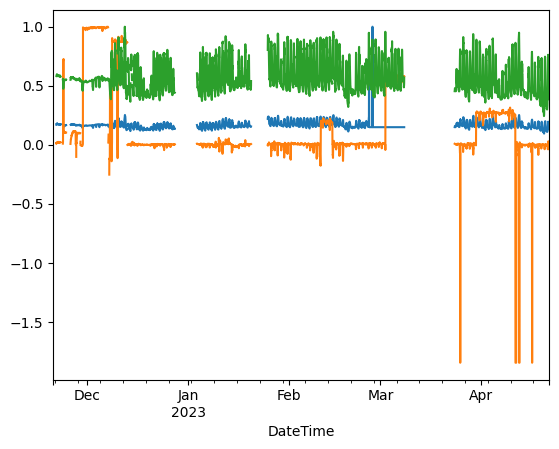

In [283]:
import numpy as np

max_temp_value = sensor_data['temperature'].max()
max_conc_value_1 = sensor_data['measuring 1'].max()
max_conc_value_2 = sensor_data['measuring 2'].max()
sensor_data['temperature'].apply(lambda v: v/max_temp_value if not np.isnan(v) else v).plot()
sensor_data['measuring 1'].apply(lambda v: v/max_conc_value_1 if not np.isnan(v) else v).plot()
sensor_data['measuring 2'].apply(lambda v: v/max_conc_value_2 if not np.isnan(v) else v).plot()

## Tag concentration data according to environmental tag

In [284]:
from SensorDataAnalysisService import SensorDataAnalysisService as sensor_analysis

def tag_by_env_tag(sensor_1_tag, sensor_2_tag, env_tag):
    if sensor_1_tag != 'VALID': return sensor_1_tag
    if sensor_2_tag != 'VALID': return sensor_2_tag
    if env_tag != 'VALID': return 'INVALID_ENV'
    return 'VALID'

tags_dataframe = sensor_data[['Tag 1', 'Tag 2', 'Temperature Tag']]
sensor_data['Tag'] = tags_dataframe.apply(lambda df: tag_by_env_tag(df[0], df[1], df[2]), axis=1)
sensor_data = sensor_data.drop(columns=['Tag 1', 'Tag 2', 'Temperature Tag'])
tags = ['MISSING','LTLL', 'GTUL', 'BADSPIKE', 'VALID', 'LTQTLE01', 'GTQTLE99', 'INVALID_ENV']
data_contabilization = sensor_analysis.count_tags(tags, sensor_data)
data_contabilization

,#,%
MISSING,1208,8.259829
LTLL,2909,19.890598
GTUL,0,0.0
BADSPIKE,184,1.25812
VALID,4138,28.294017
LTQTLE01,142,0.97094
GTQTLE99,76,0.519658
INVALID_ENV,95,0.649573
TOTAL,14625,100.0


<Axes: xlabel='DateTime'>

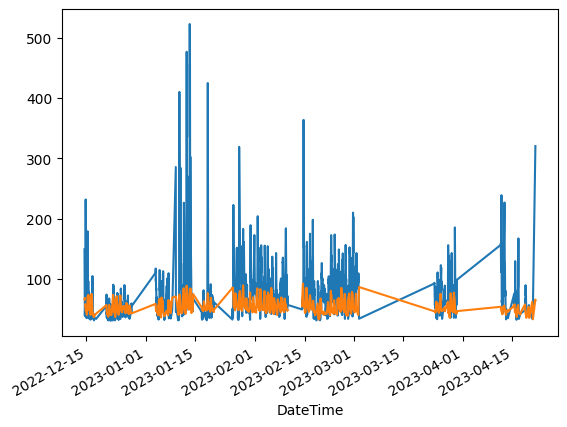

In [285]:
sensor_data[sensor_data['Tag'] == 'VALID']['measuring 1'].plot()
sensor_data[sensor_data['Tag'] == 'VALID']['measuring 2'].plot()

## Analyse data

In [286]:
valid_dataframe = sensor_data[sensor_data['Tag'] == 'VALID'].drop(columns=['Tag'])
valid_dataframe.head()

,measuring 1,measuring 2,temperature,Hour
DateTime,,,,
2022-12-14 11:45:00,148.977432,65.786832,31.815,11
2022-12-14 14:15:00,38.164608,68.152488,31.720,14
2022-12-14 14:30:00,41.119224,68.152488,31.545,14
2022-12-14 14:45:00,47.519256,66.169656,31.295,14
2022-12-14 15:00:00,47.646864,NaN,31.075,15


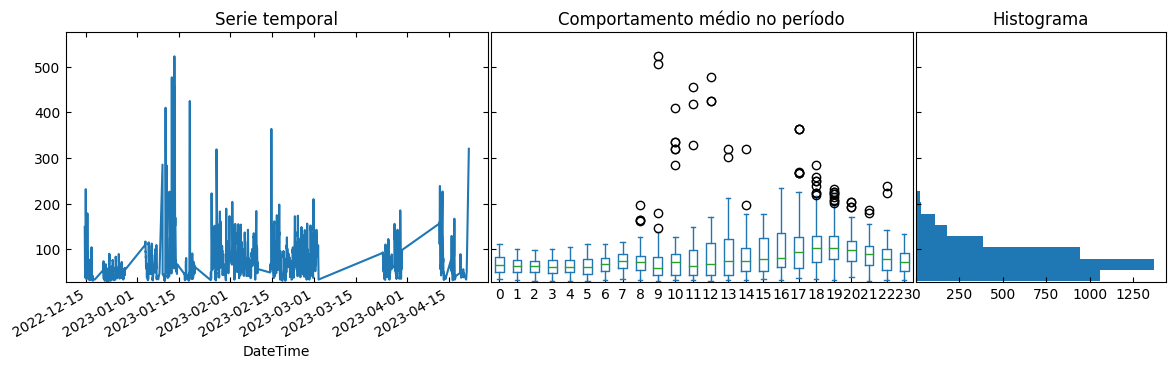

In [287]:
dataframe = valid_dataframe.rename(columns={'measuring 1': 'measuring'})
sensor_analysis.plot_box_hist(df=dataframe, bins=20)

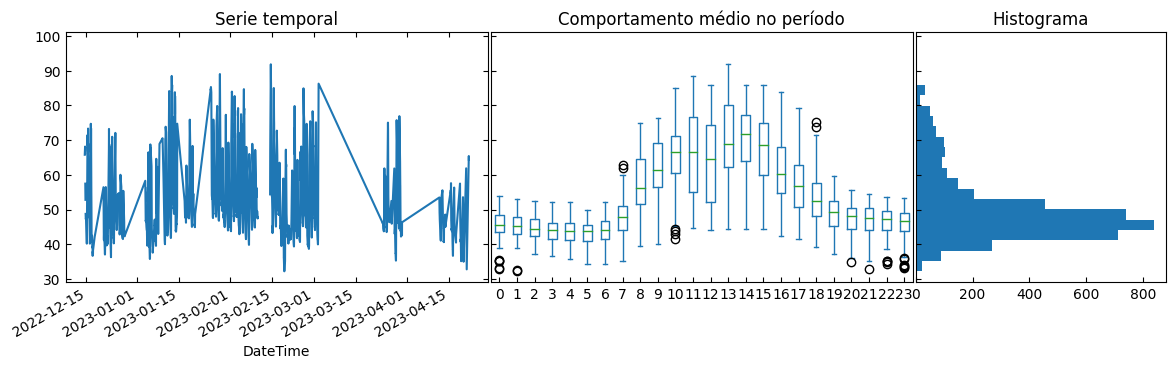

In [288]:
dataframe = valid_dataframe.rename(columns={'measuring 2': 'measuring'})
dataframe['Hour'] = dataframe.index.hour
sensor_analysis.plot_box_hist(df=dataframe, bins=20)

## Plot sensor 1 vs. temperature

Spearmans correlation coefficient: 0.375
Samples are correlated (reject H0) p=0.000
Kendall correlation coefficient: 0.375
Samples are correlated (reject H0) p=0.000


Text(0.05, 0.9, "Kendall's tau=0.269, p<0.05")

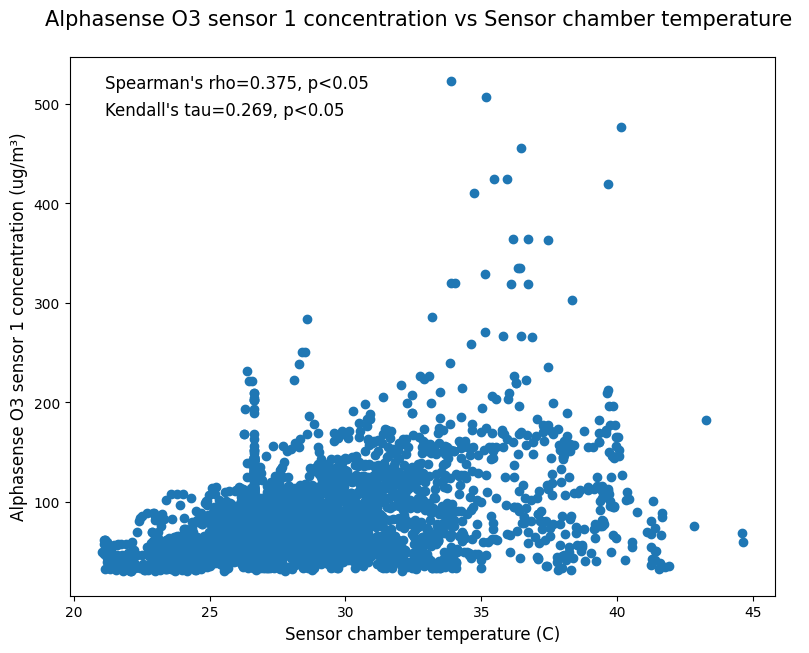

In [289]:
from scipy.stats import spearmanr
from scipy.stats import kendalltau
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(1.3*7,7))
plt.scatter(valid_dataframe['temperature'], valid_dataframe['measuring 1'])
plt.title('Alphasense O3 sensor 1 concentration vs Sensor chamber temperature \n', 
          fontdict={'fontsize':15})
plt.xlabel('Sensor chamber temperature (C)', 
           fontsize=12)
plt.ylabel('Alphasense O3 sensor 1 concentration (ug/m\N{SUPERSCRIPT THREE})', 
           fontsize=12)
coef, p = spearmanr(valid_dataframe['temperature'], valid_dataframe['measuring 1'], 
                    nan_policy='omit')
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)

kendall, pken = kendalltau( valid_dataframe['temperature'], valid_dataframe['measuring 1'], 
                            nan_policy='omit')
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)
 
string = 'Spearman\'s rho=%.3f, p<0.05' % coef
plt.text(0.05, 0.95, string, horizontalalignment='left', fontsize=12,
         verticalalignment='center', transform=ax.transAxes)
string = 'Kendall\'s tau=%.3f, p<0.05' % kendall
plt.text(0.05, 0.90, string, horizontalalignment='left', fontsize=12,
         verticalalignment='center', transform=ax.transAxes)

Spearmans correlation coefficient: 0.856
Samples are correlated (reject H0) p=0.000
Kendall correlation coefficient: 0.856
Samples are correlated (reject H0) p=0.000


Text(0.05, 0.9, "Kendall's tau=0.704, p<0.05")

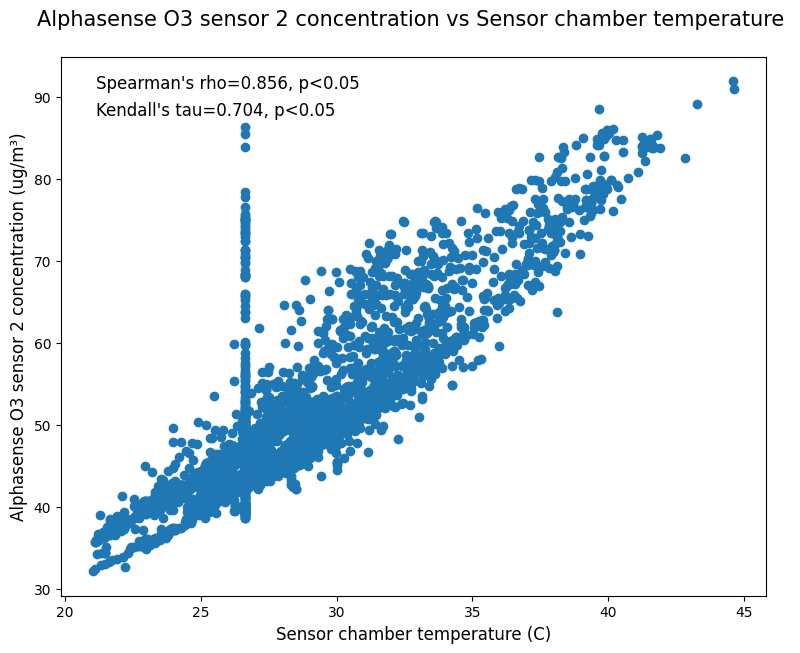

In [290]:
from scipy.stats import spearmanr
from scipy.stats import kendalltau
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(1.3*7,7))
plt.scatter(valid_dataframe['temperature'], valid_dataframe['measuring 2'])
plt.title('Alphasense O3 sensor 2 concentration vs Sensor chamber temperature \n', 
          fontdict={'fontsize':15})
plt.xlabel('Sensor chamber temperature (C)', 
           fontsize=12)
plt.ylabel('Alphasense O3 sensor 2 concentration (ug/m\N{SUPERSCRIPT THREE})', 
           fontsize=12)
coef, p = spearmanr(valid_dataframe['temperature'], valid_dataframe['measuring 2'], 
                    nan_policy='omit')
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)

kendall, pken = kendalltau( valid_dataframe['temperature'], valid_dataframe['measuring 2'], 
                            nan_policy='omit')
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)
 
string = 'Spearman\'s rho=%.3f, p<0.05' % coef
plt.text(0.05, 0.95, string, horizontalalignment='left', fontsize=12,
         verticalalignment='center', transform=ax.transAxes)
string = 'Kendall\'s tau=%.3f, p<0.05' % kendall
plt.text(0.05, 0.90, string, horizontalalignment='left', fontsize=12,
         verticalalignment='center', transform=ax.transAxes)

## Remove temperature dependance

### Sensor 2

In [291]:
from sklearn.linear_model import LinearRegression

sample_dataframe = valid_dataframe[['temperature', 'measuring 2']].dropna()
temperature = sample_dataframe['temperature']
concentration = sample_dataframe['measuring 2']

# Reshape the data to have a 2D array for sklearn
X = temperature.values.reshape(-1, 1)
y = concentration.values

# Create a linear regression model
model = LinearRegression()

# Fit the model
model.fit(X, y)

# Predict concentration based on the temperature
concentration_predicted = model.predict(X)

# Remove the temperature component from the concentration
concentration_without_temperature = y - concentration_predicted

# Create a new pandas Series with the result
result_series = pd.Series(concentration_without_temperature - np.min(concentration_without_temperature), 
                            index=sample_dataframe.index, name = 'measuring 2 no Temp')

# Print the result
print(result_series)

DateTime
2022-12-14 11:45:00    18.593320
2022-12-14 14:15:00    21.182750
2022-12-14 14:30:00    21.594965
2022-12-14 14:45:00    20.201012
2022-12-14 16:00:00    16.476137
                         ...    
2023-04-20 17:00:00     8.255475
2023-04-20 17:15:00     7.913641
2023-04-20 21:00:00     8.191135
2023-04-21 13:45:00    13.000882
2023-04-21 14:00:00    12.260710
Name: measuring 2 no Temp, Length: 4125, dtype: float64


#### Plot the results

/var/folders/wc/_83zcrx913j1dqwg4g90kbhh0000gp/T/ipykernel_9080/2639893575.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,1,1)


Text(0.5, 1.0, 'Alphasense O3 sensor 2 concentration withou temperature component vs Sensor chamber temperature \n')

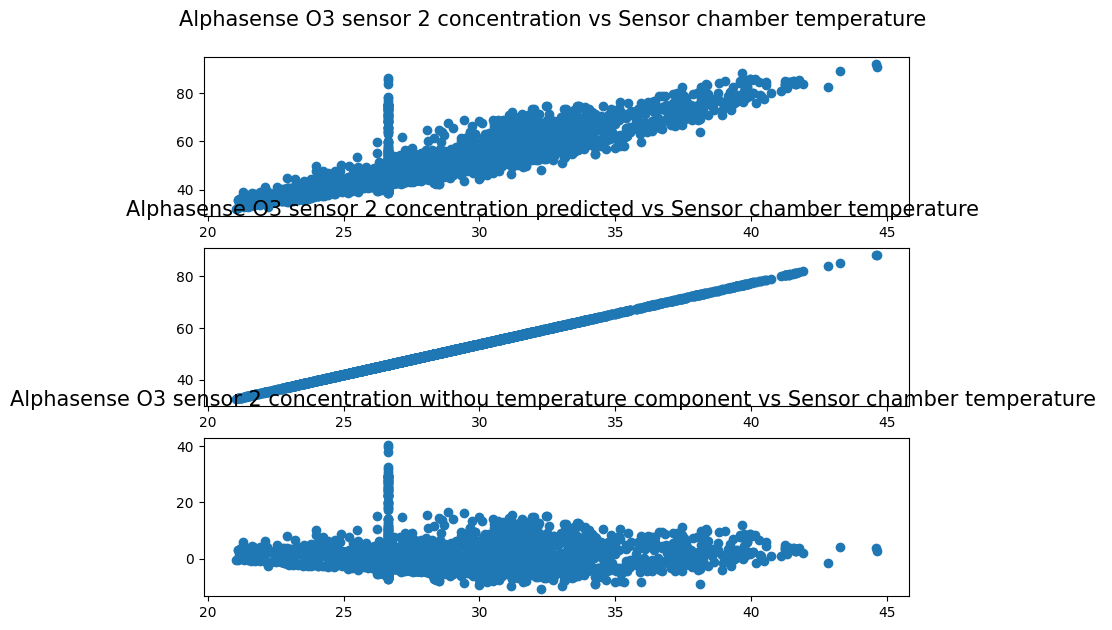

In [292]:
from scipy.stats import spearmanr
from scipy.stats import kendalltau
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(1.3*7,7))
plt.subplot(3,1,1)
plt.scatter(temperature, concentration)
plt.title('Alphasense O3 sensor 2 concentration vs Sensor chamber temperature \n', 
          fontdict={'fontsize':15})
plt.subplot(3,1,2)
plt.scatter(temperature, concentration_predicted)
plt.title('Alphasense O3 sensor 2 concentration predicted vs Sensor chamber temperature \n', 
          fontdict={'fontsize':15})
plt.subplot(3,1,3)
plt.scatter(temperature, concentration_without_temperature)
plt.title('Alphasense O3 sensor 2 concentration withou temperature component vs Sensor chamber temperature \n', 
          fontdict={'fontsize':15})

#### Store concentration without temperature in dataframe

In [293]:
valid_dataframe = pd.concat([valid_dataframe,result_series], axis=1)
valid_dataframe.head()

,measuring 1,measuring 2,temperature,Hour,measuring 2 no Temp
DateTime,,,,,
2022-12-14 11:45:00,148.977432,65.786832,31.815,11,18.593320
2022-12-14 14:15:00,38.164608,68.152488,31.720,14,21.182750
2022-12-14 14:30:00,41.119224,68.152488,31.545,14,21.594965
2022-12-14 14:45:00,47.519256,66.169656,31.295,14,20.201012
2022-12-14 15:00:00,47.646864,NaN,31.075,15,NaN


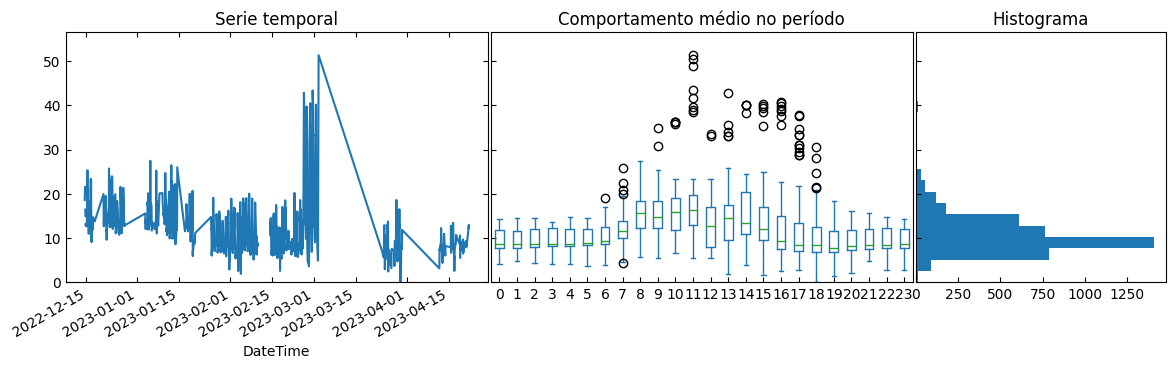

In [294]:
dataframe = valid_dataframe.rename(columns={'measuring 2 no Temp': 'measuring'})
dataframe['Hour'] = dataframe.index.hour
sensor_analysis.plot_box_hist(df=dataframe, bins=20)

## Plot sensor 1 vs. sensor 2

Spearmans correlation coefficient: 0.332
Samples are correlated (reject H0) p=0.000
Kendall correlation coefficient: 0.332
Samples are correlated (reject H0) p=0.000


Text(0.05, 0.9, "Kendall's tau=0.238, p<0.05")

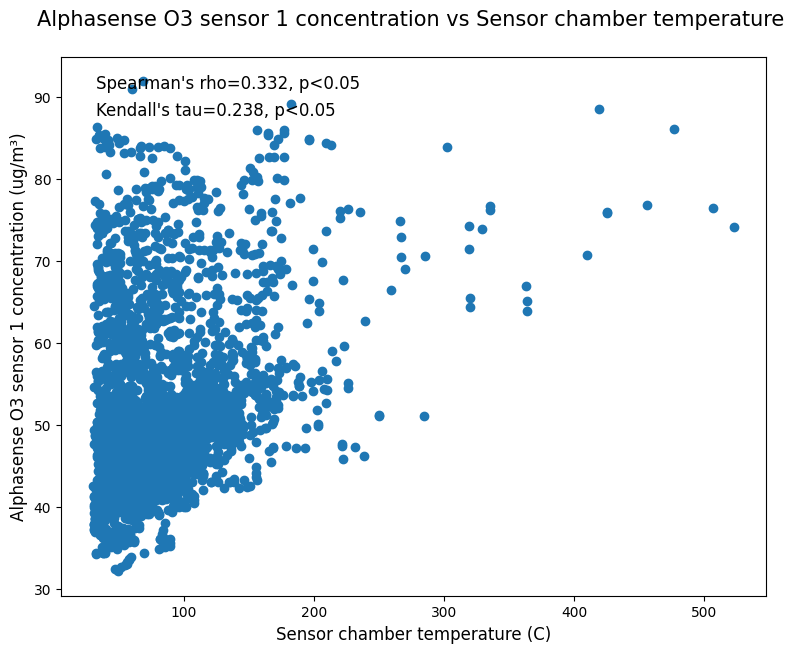

In [295]:
from scipy.stats import spearmanr
from scipy.stats import kendalltau
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(1.3*7,7))
plt.scatter(valid_dataframe['measuring 1'], valid_dataframe['measuring 2'])
plt.title('Alphasense O3 sensor 1 concentration vs Sensor chamber temperature \n', 
          fontdict={'fontsize':15})
plt.xlabel('Sensor chamber temperature (C)', 
           fontsize=12)
plt.ylabel('Alphasense O3 sensor 1 concentration (ug/m\N{SUPERSCRIPT THREE})', 
           fontsize=12)
coef, p = spearmanr(valid_dataframe['measuring 1'], valid_dataframe['measuring 2'], 
                    nan_policy='omit')
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)

kendall, pken = kendalltau(valid_dataframe['measuring 1'], valid_dataframe['measuring 2'], 
                            nan_policy='omit')
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)
 
string = 'Spearman\'s rho=%.3f, p<0.05' % coef
plt.text(0.05, 0.95, string, horizontalalignment='left', fontsize=12,
         verticalalignment='center', transform=ax.transAxes)
string = 'Kendall\'s tau=%.3f, p<0.05' % kendall
plt.text(0.05, 0.90, string, horizontalalignment='left', fontsize=12,
         verticalalignment='center', transform=ax.transAxes)

# Resample Data

,measuring 1,measuring 2,temperature,Hour,measuring 2 no Temp,Count 1,Count 2
DateTime,,,,,,,
2022-12-14 11:30:00,148.977432,65.786832,31.8150,11,18.593320,1,1
2022-12-14 12:30:00,NaN,NaN,NaN,12,NaN,0,0
2022-12-14 13:30:00,NaN,NaN,NaN,13,NaN,0,0
2022-12-14 14:30:00,42.267696,67.491544,31.5200,14,20.992909,3,3
2022-12-14 15:30:00,50.822340,NaN,30.5675,15,NaN,4,0


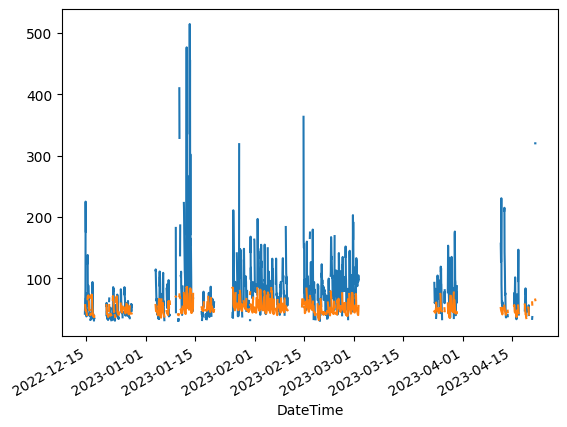

In [296]:
data_1HR = valid_dataframe.resample('H').mean()
data_1HR['Hour'] = data_1HR.index.hour
data_1HR['Count 1'] = (valid_dataframe['measuring 1'].resample('H').count())
data_1HR['Count 2'] = (valid_dataframe['measuring 2'].resample('H').count())
data_1HR.index = data_1HR.index.map(lambda t: t.replace(minute=30, second=0))
data_1HR['measuring 1'].plot()
data_1HR['measuring 2'].plot()
data_1HR.head()

#### Tag hourly data according to the number of samples in an hour
At least 3 samples must be valid in an hour (75 %) for the hourly data be considered as valid

<Axes: xlabel='DateTime'>

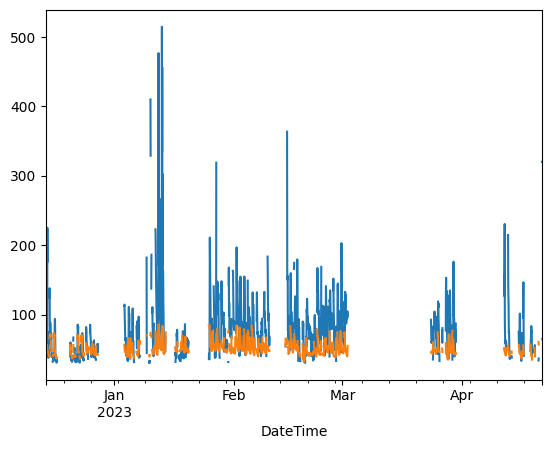

In [297]:
data_1HR['Tag'] = (data_1HR[['Count 1', 'Count 2']].apply(lambda df: 'VALID' if (df[0] >= 3 or df[1] >= 3) else 'LOWSAMPLES', 
                                                            axis=1))
data_1HR['measuring 1'].resample('H').mean().plot()
data_1HR['measuring 2'].resample('H').mean().plot()

#### Valid data contabilization

In [298]:
tags = ['LOWSAMPLES','VALID'] 
data_contabilization = sensor_analysis.count_tags(tags, data_1HR)
data_contabilization

,#,%
LOWSAMPLES,2092,68.010403
VALID,984,31.989597
TOTAL,3076,100.0


In [299]:
valid_data_1HR = data_1HR[data_1HR['Tag'] == 'VALID']

# Save Data

In [300]:
import os

output_directory_path = 'data/output/'
processing_directory_path = '../data-processing/input/'
valid_filename = '_and_temp_valid.csv'
valid_filename_1HR = '_and_temp_valid_1HR.csv'

valid_1HR_file_path_output = output_directory_path + SENSOR_NAME + valid_filename_1HR
valid_file_path_output = output_directory_path + SENSOR_NAME + valid_filename

valid_processing_1HR_file_path = processing_directory_path + SENSOR_NAME + valid_filename_1HR
valid_processing_file_path = processing_directory_path + SENSOR_NAME + valid_filename

if not os.path.exists(output_directory_path):
    os.makedirs(output_directory_path)

if not os.path.exists(processing_directory_path):
    os.makedirs(processing_directory_path)

valid_dataframe.to_csv(valid_file_path_output)
valid_data_1HR.to_csv(valid_1HR_file_path_output)

valid_dataframe.to_csv(valid_processing_file_path)
valid_data_1HR.to_csv(valid_processing_1HR_file_path)